In [1]:
# Dynamic time warping, networkx graph
    # class containing
        # trend id, prices, nearest neighbor, distance to nearest neighbor 
        # if trend has all distance matrices computed, pop to reduce calculations
# dimensionality reduction using pca, t-sne
# data generation, cnn

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy

from dtaidistance import dtw
from scipy import stats

from database_credentials import get_database_url
from load_transform import load_transform_combine, pivot

In [3]:
database_url = get_database_url()
engine = sqlalchemy.create_engine(database_url)
connection = engine.connect()

In [4]:
sell_data = load_transform_combine(4, connection)
sell_data = pivot(sell_data)
trends = sell_data.to_numpy()

In [5]:
# z normalize to compare shape - across axis or all (?)
trends = stats.zscore(trends, axis=1)
num_trends = trends.shape[0]
distances = np.zeros((num_trends, num_trends))

graph = nx.Graph()
for x, y in np.ndindex(distances.shape):
    if (x > y):
        distance = dtw.distance(trends[x], trends[y])
        graph.add_weighted_edges_from([(x, y, distance)])
        distances[x][y] = distance
        
        # mirror along diagonal to reduce computation time
        # distances[y][x] = distance 
        
# fill diagonal so the most similar sequence is not itself
np.fill_diagonal(distances, np.inf) 

In [6]:
# increase weight, check degree (?)
# visualize and optimize weight cut-off / degree
remove = [edge for edge in graph.edges(data=True) if edge[2]['weight'] > 0.70]
graph.remove_edges_from(remove)

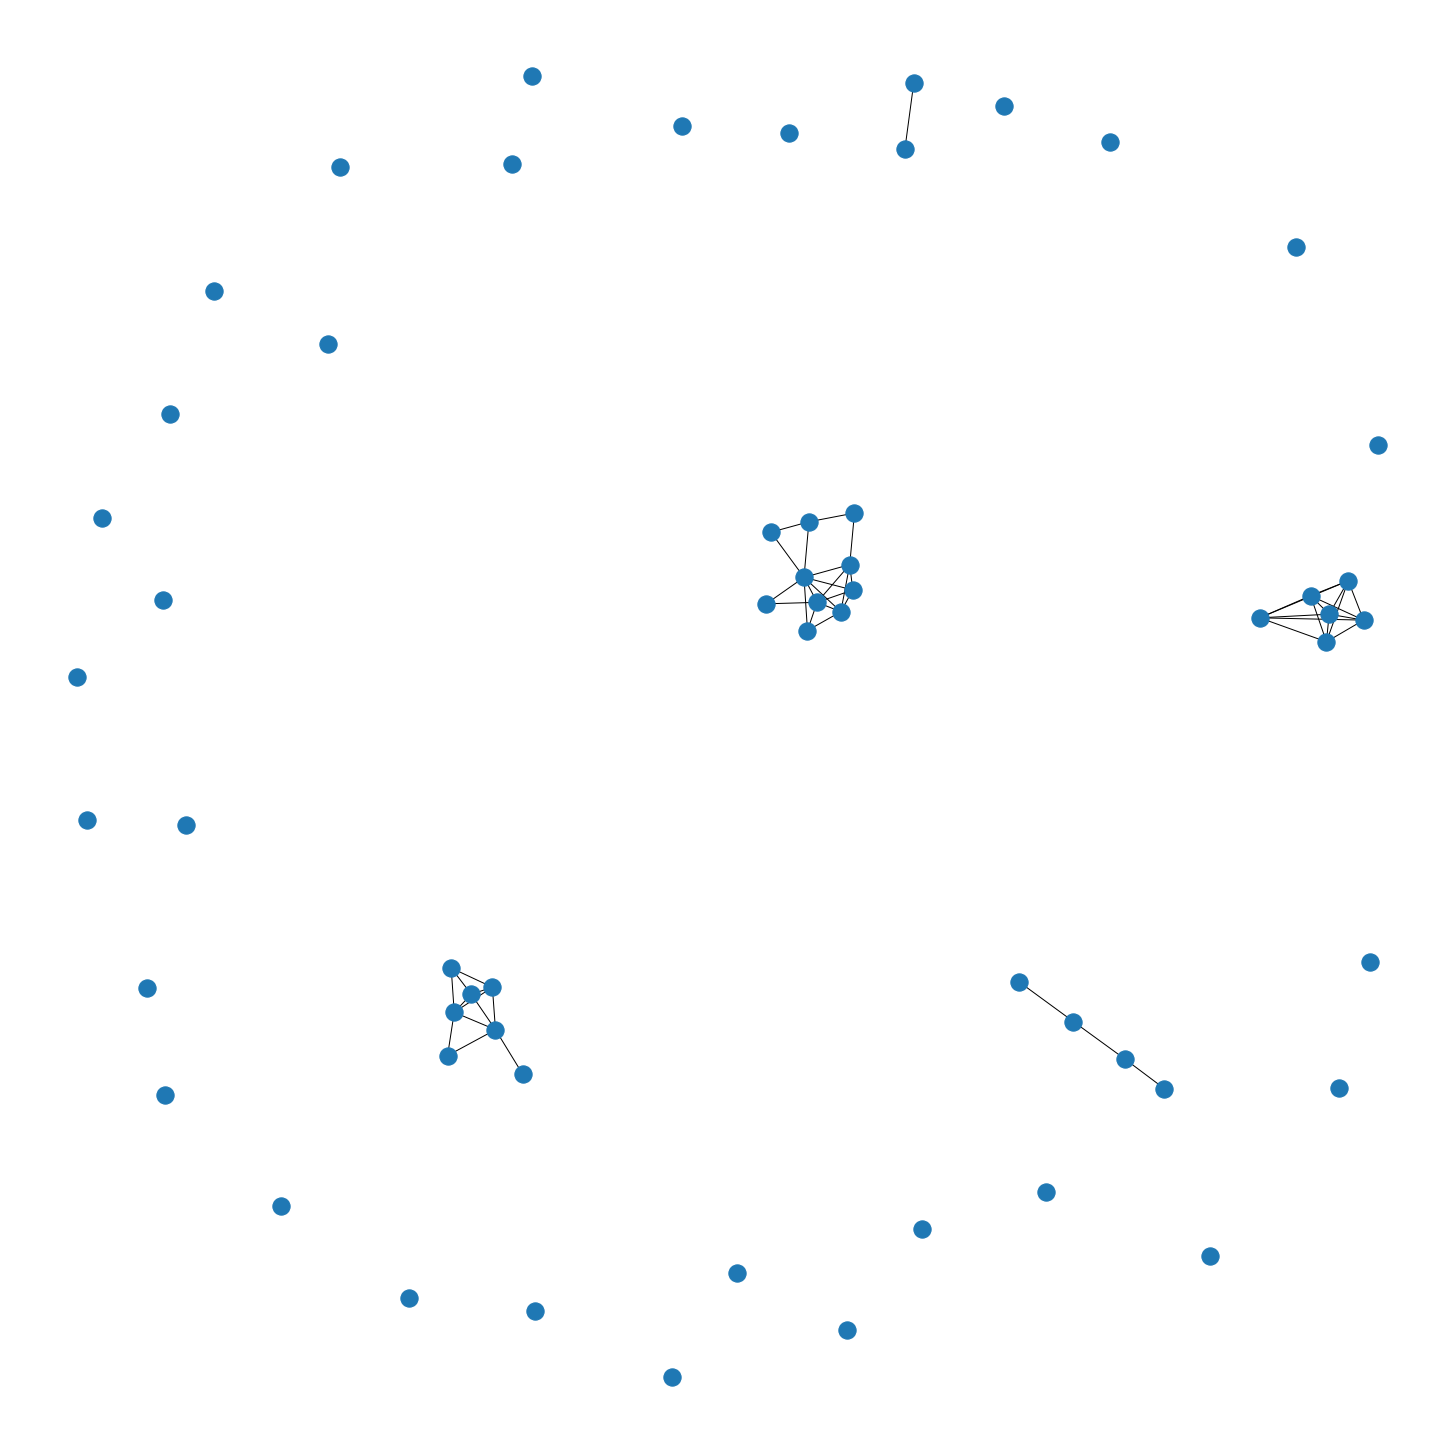

In [7]:
plt.figure(figsize=(20, 20))
nx.draw(graph)
plt.show()

In [8]:
# label components with len == 1 as one group (?)
for component in nx.connected_components(graph):
    print(component)

{1}
{0}
{2}
{3}
{16, 4, 36, 52}
{5}
{6}
{32, 7, 8, 40, 42, 9, 14, 18, 22, 27}
{10, 23}
{11}
{12}
{13}
{15}
{33, 35, 17, 25, 26, 29}
{41, 44, 47, 48, 19, 20, 28}
{21}
{24}
{30}
{31}
{34}
{37}
{38}
{39}
{43}
{45}
{46}
{49}
{50}
{51}
{53}
{54}
{55}
{56}
{57}
{58}
